### Question 1
 1.  Write code for creating 200 simple random samples of size 30 from a population of size 1000000 that follows a beta distribution with loc=3, scale =4, 𝛼=1.5  and  𝛽=2.3 . If you consider a 96% confidence level, create the corresponding 200 confidence intervals and check with code how many trap inside the mean of the population. Hint: you can approximate the mean and the standard deviation of the population.

In [ ]:
import numpy as np
import scipy.stats as stats
from scipy.stats import beta

In [ ]:
#Generating the population
population = beta.rvs(loc = 3, scale = 4, a = 1.5, b = 2.3, size = 1000000);
population

array([3.88994305, 3.45854424, 4.0499465 , ..., 5.06640132, 4.03139881,
       6.48587351])

In [ ]:
#Creating a 2d array of all the samples
array = np.zeros((200,30))
array.shape

(200, 30)

In [ ]:
#Filling 2d array with random samples from population
for i in range(200):
  for k in range(30):
    array[i][k] = np.random.choice(population)

In [ ]:
#Computing the mean and standard deviation of each sample
mean = array.mean(axis = 1)
std = array.std(axis = 1)

In [ ]:
#Calculating confidence interval for each sample
confidenceInt = []
for i in range(200):
  confidenceInt.append(stats.t.interval(alpha = 0.96, df = len(array[i]) - 1, loc = mean[i], scale = std[i]))

In [ ]:
#How many samples contain the population mean
populationM = population.mean()
count = 0
for i in range(200):
  if (confidenceInt[i][0] <= populationM and confidenceInt[i][1] >= populationM):
    count+=1
count

200

In [ ]:
#All 200 samples trap inside the mean of the population

### Question 2

2. Create a complete computational diagram for the Upper Confidence Bound algorithm implemented in class.  

<figure>
<center>
<img src='https://drive.google.com/uc?id=1-R5g0hDCRd2ryYucUNd6sODdyS97Pizp'width='800px'/>
<figcaption>Computational Graph</figcaption></center>
</figure>


### Question 3

3. Create a mini-casino with 6 slot machines whose such that the rewards are distributed as follows:
Machine_1: Normal distribution with mean 0.2 and standard deviation 1
Machine_2: Uniform distribution supported between 1 and 2.5.
Machine_3: Triangular distribution supported between 0.5 and 2, and the vertex projection splits the base 65%-35%.
Machine_4: Gamma distribution supported between -0.25 and infinity, with 𝛽 = 2/3, and 𝛼=2
Machine_5: Beta distribution supported between 0 and 2.5, with 𝛼=2.5, and 𝛽 = 2.3
Machine_6: Normal distribution with mean 0.5 and standard deviation 0.75
Assume it costs $1.25 to play each machine once. Write code and apply the reinforcement learning method studied to determine the most lucky machine(s)

In [ ]:
import numpy as np
import scipy.stats as stats
from scipy.stats import norm, beta, triang, uniform, gamma
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

In [ ]:
#Initializing all the machines in one method and returning a value every time method is called
def casino(machine):
  if(machine == 1):
    return norm.rvs(loc = 0.2, scale = 1)
  if(machine == 2):
    return uniform.rvs(loc = 1, scale = 1.5)
  if(machine == 3):
    return triang.rvs(loc = 0.5, scale = 2, c = 0.65 * (2 - 0.5) / (2 - 0.5))
  if(machine == 4):
    return gamma.rvs(loc = -0.25, a = 2, scale = 1/(2/3))
  if(machine == 5):
    return beta.rvs(loc = 0, scale = 2.5, a = 2.5, b = 2.3)
  if(machine == 6):
    return norm.rvs(loc = 0.5, scale = 0.75)

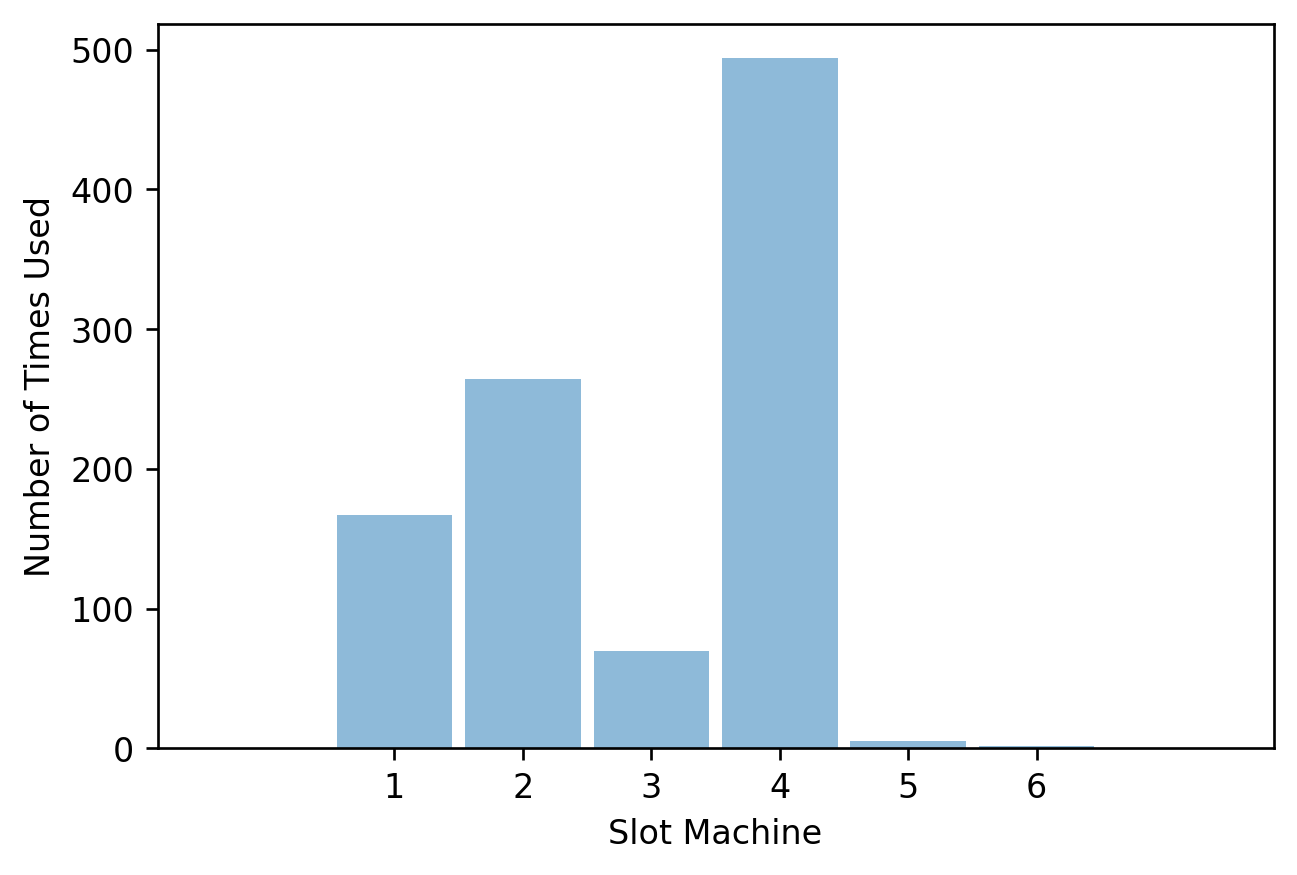

In [ ]:
played = []
award_record = []
count = 1

c = 0.9
repeat = [0] * 6
sum = [0] * 6


while count < 1000:
  unit = 1
  max = 0
  for i in range(6):
    if (repeat[i] > 0):
      average = sum[i]/repeat[i]
      E = c*np.sqrt(np.log(10000)/repeat[i])
      upper = average + E
    else:
      upper = 1e200
    if(upper >= max):
      max = upper
      unit = i+1
    played.append(unit)
    repeat[unit-1] = repeat[unit-1] + 1
    award = casino(machine=unit)
    sum[unit-1] = sum[unit-1] + award - 1.25
    count += 1

plt.hist(played, bins=range(9),rwidth=0.9, alpha=0.5,align='left')
plt.xlabel("Slot Machine")
plt.xticks(np.arange(1,7,1))
plt.ylabel("Number of Times Used")
plt.show()
#The lucky machine is machine 4